In [2]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt 
import pandas as pd
from numpy.linalg import inv
from scipy import fft

#Question 1
def least_squares(A,b):
    '''
    Solve the least_squares equation
    '''
    ans = inv(A.T@A)@(A.T) @ b 
    return ans 

def reg_least_squares(x,A,b,sigma):
    '''
    Solve the regularized least_squares equation 
    '''
    #I will skip a couple steps and use the solution from the first midterm to solve directly 
    ans = inv(A.T@A + sigma*np.identity(len(x)))@(A.T)@b
    return ans

def plot(x,y,f):
    '''
    plot our findings (x is the vector for years, y is the vector for the flow rate, f is for plotting the actual values)
    '''
    plt.figure(figsize = (7,7))
    for i in range(0,len(y)):
        plt.scatter(x[i],f[i],s = 5, c = 'g')
    for i in range(0,len(y)):
         plt.scatter(x[i],y[i],s = 5,c = 'b')
    plt.plot(x,y,c = 'r')
    plt.plot(x,f,c = 'y')
    plt.xlabel('Years')
    plt.ylabel('Flow Rate') 
    plt.title("Flow Rate Versus Year")
    plt.show()

def plot_individual(x,y): 
    '''
    plot our findings (x is the vector for years, y is the vector for the flow rate, f is for plotting the actual values)
    '''
    plt.figure(figsize = (7,7))
    for i in range(0,len(y)):
         plt.scatter(x[i],y[i],s = 5,c = 'b')
    #plt.plot(x,y,c = 'r')
    plt.xlabel('Years')
    plt.ylabel('Flow Rate') 
    plt.title("Flow Rate Versus Year")
    plt.show()

Graph of Least Squares


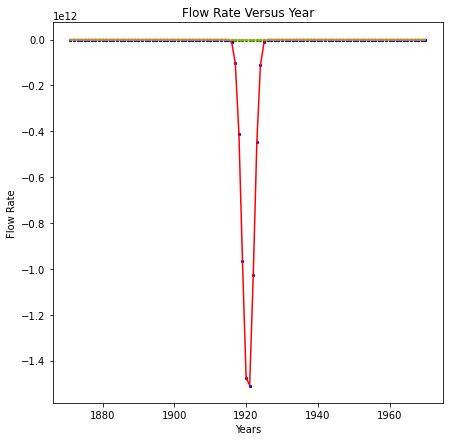

Graph of Regularized Least Squares with Sigma = 1


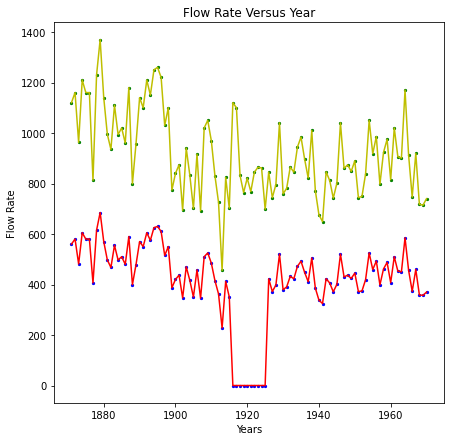

Graph of Least Squares with Sigma = 10


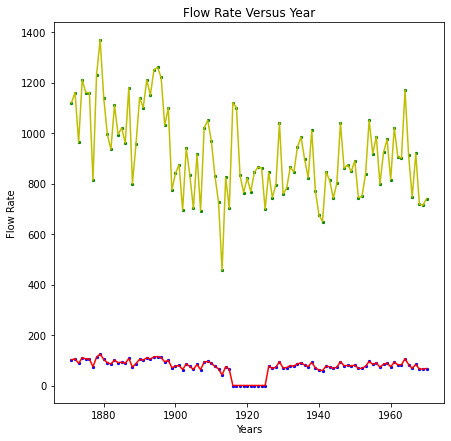

In [3]:
#For grader: Please use this variable to test my code. 
#Enter a value between 1 and 45
#This variable will omit that number of entries in my matrix.  
omitted = 10

#read in our files 
data = pd.read_csv('nile.csv')

#convert pandas datafile to numpy 
data = pd.DataFrame(data).to_numpy()

#define the length of our data 
n = 100

time = []
for i in range(0,n):
    time.append(data[i][0])

f = []
for i in range(0,n):
    f.append(data[i][1])
    
f_temp = f.copy()
#get rid of some values 
for i in range(0,omitted):
    change = 0
    f_temp[i+45] = change

f_new = []
for i in range(0,len(f_temp)):
    if (f_temp[i] != 0):
        f_new.append(f_temp[i])

#define X
X = scipy.fft.dct(np.eye(len(data)), norm='ortho')
alpha = X.T @ f 

#get rid of the 0 entries and define as f_new and X_new 
range_new = []
for i in range(0,len(f_temp)):
    if (f_temp[i] == 0):
        range_new.append(i)

#manual delete, can be improved 
X_temp = X.copy()
res = range_new[::len(range_new)-1]
rg = [] 
for i in range(res[0],res[1]+1):
    rg.append(i)

X_temp = np.delete(X, rg, axis = 0)
X_new = X_temp.copy()

#run our algorithm to obtain our answer
alpha_least_squares = least_squares(X_new,f_new)
alpha_reg_least_squares = reg_least_squares(X,X_new,f_new,1) #sigma = 1
alpha_reg_least_squares_2 = reg_least_squares(X,X_new,f_new,10) #sigma = 10

f_least_squares = X @ alpha_least_squares
f_reg_least_squares = X @ alpha_reg_least_squares
f_reg_least_squares_2 = X @ alpha_reg_least_squares_2

print("Graph of Least Squares")
plot(time,f_least_squares,f)
print("Graph of Regularized Least Squares with Sigma = 1")
plot(time,f_reg_least_squares,f)
print("Graph of Least Squares with Sigma = 10")
plot(time,f_reg_least_squares_2,f)

In [4]:
#Question 2 
'''
variables of optimization is ai = ui + vi for all i = 1,...,n
'''
from scipy.optimize import linprog 

# print(alpha) 
# print(X_new)
# print(f_new) 

#This should be XI 
A = X_new 
#should be fI
b = f_new

#define n 
n = len(A[0])

#define c
c = []
for i in range(0,n*2):
    c.append(1)

#define our negative A matrix
A_neg = np.negative(A) 

#create A_new matrix for the left side of our constraints 
A_new = []
for i in range(0,len(A)):
    temp = [] 
    for j in range(0,len(A[0])):
        temp.append(A[i][j])
    for k in range(0,len(A[0])):
        temp.append(A_neg[i][k])
    A_new.append(temp)

#set our bounds 
uv_bound = (0,None)
all_bounds = [] 
for i in range(0,len(c)):
    all_bounds.append(uv_bound)

#perform linear programming 
res = linprog(c, A_eq=A_new, b_eq=b, bounds=all_bounds)
print(res.message) #check if successful 

#correct our values since we want to convert back to min(x) by using abs(xi) = abs(ui) + abs(vi) [abs will not make a difference but I'm still including it to be safe]
true_ans = [] 
for i in range(0,n):
    u_v = abs(res.x[i]) - abs(res.x[i+99])
    true_ans.append(u_v)

#print out our answer
print(true_ans)

Optimization terminated successfully.
[9152.533475498536, 762.0285055624573, 689.5452117620589, 152.35527835267953, 1.2295776975117603e-06, -164.09620381384426, -196.9128466759845, 173.81308545140672, 9.71958378365508e-05, 294.352210751498, 54.532940428405915, 1.56616197348102e-05, -8.237348765800978e-05, -290.0354064675606, -164.2809273059096, -244.89475087381305, 232.510219969639, 115.42356513865218, -1.7743667889977105e-06, -10.29833326787226, -7.172961604031298e-05, 6.782989245288576, 3.5150269963659524e-06, 3.898739123838699e-06, -52.793290042968835, 69.81184325275453, 240.71039434392273, 4.715807684234723, 1.3467949577790973e-06, -98.6709498408203, -52.202241278798624, 146.5569410780925, -1.8937677636761386e-08, -104.86205299997134, -208.3148090592407, -125.21792797618214, -75.6987055474413, 3.3371010170824218e-06, -74.37578606695362, -3.5650200656028156e-06, -17.55695611020261, 145.68003952775948, 12.909935425868087, 31.395713228766652, 24.575708149900002, 169.8041979762816, -1.

Graph of Least Squares


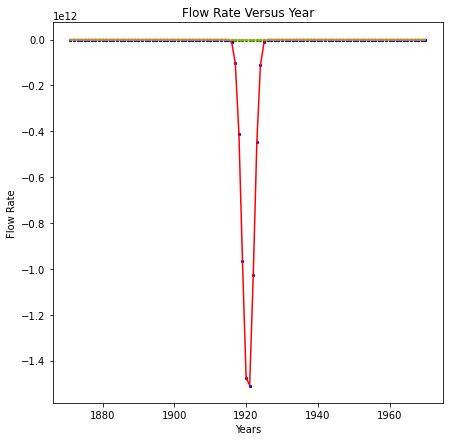

Graph of Regularized Least Squares with Sigma = 1


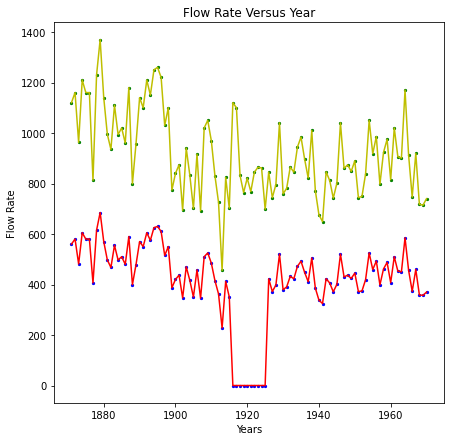

Graph of scipy.optimize.linprog


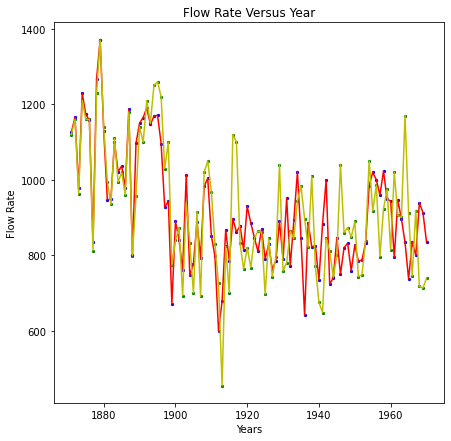

In [5]:
#plot to compare the result in problem 2 to problem 1
f_scipy = X @ true_ans

print("Graph of Least Squares")
plot(time,f_least_squares,f)
print("Graph of Regularized Least Squares with Sigma = 1")
plot(time,f_reg_least_squares,f)
print("Graph of scipy.optimize.linprog")
plot(time, f_scipy,f)

In [6]:
#Question 4

#define our n as length of f (since there are that many lambda corresponding to our f)
n = len(X_new[0]) #100
m = len(f_new) #90

#This should be XI (define our negative A matrix)

A = X_new.copy()
A_one = A.T
A_neg = np.negative(A_one) 

#define our c
c_new = f_new
c_neg = np.negative(f_new)  

#define our b 
one = []
for i in range(0,n*2):
    one.append(1)    
b = one 

#Build the A matrix (the big one!)
#n = 100, m = 90
A_new = []
for i in range(0,n):
    temp = [] 
    for j in range(0,m):
        temp.append(A_one[i][j])
    A_new.append(temp) 

for k in range(0,n):
    temp = []
    for l in range(0,m):
        temp.append(A_neg[k][l])
    A_new.append(temp)

#define our bound for all our lambda 
lambda_bound = (None,None)
tot_bound = []
for i in range(0,m):
    tot_bound.append(lambda_bound)
    
# print(c)
# print(A)
# #print(A_new)
# print(b)
# print(tot_bound)

res = linprog(c_neg, A_ub=A_new, b_ub=b, bounds=tot_bound)
print(res.message) #check if successful 
opt_lambda = res.x
print(res.x)

Optimization terminated successfully.
[ 0.65615589  0.88037842 -1.34929788  1.16401949  0.71576201  1.09112695
 -1.65754069  0.57702339  1.85770987  0.57095085 -0.32646109 -1.04682996
  0.04048485  0.59816974  0.70867818  0.16621516  1.987035   -2.23396754
  0.81922912  0.27579702  0.71475263  0.76104265  0.33149872  2.36217479
  1.85891029  0.9658031   0.25340088  1.43811211 -0.46054501 -1.25031112
 -0.32272634 -0.94139013  0.25388899 -0.32567841 -1.70776784 -0.06168703
 -2.38962215  1.85555396  1.16188745  0.05432913  0.29769922 -0.1562884
 -2.05055397 -1.49778731  0.35753173  0.06507738 -0.37512516 -0.27227239
  1.87625981  0.21492175 -0.09448644  0.15258839 -0.66316037  0.18719321
  0.32402369  0.74825    -0.22533675  1.41676694 -0.08195882 -1.16173669
 -1.32767225  0.62019939  0.02757135  0.23981772 -0.08566356  1.12951279
 -0.89100571  0.26650147  0.29778452  0.56267522 -0.17546901  0.02372216
 -0.21253745  1.75242521  0.4248421   0.74391326 -0.95020017 -0.65537834
  0.3851106  -

Recovered values


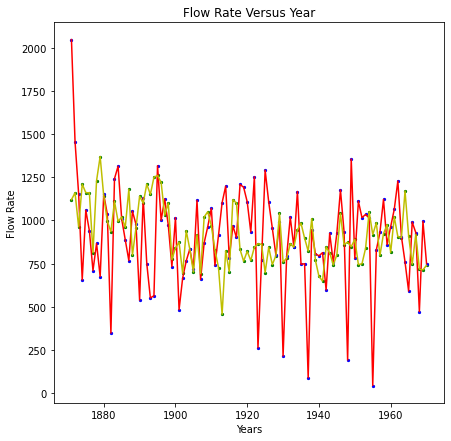

In [7]:
#Comparing the results of the dual problem 
c_new = np.array(c_new)
#######
recovery = [] 

for j in range(0,len(c_new)):
    value = c_new[j] * opt_lambda[j]
    recovery.append(value)
    
recovery = np.array(recovery) 

an = abs(X_new.T @ recovery)

print("Recovered values")
plot(time,an,f)